Overview
In this project, I will apply your understanding of Artificial Neural Networks and TensorFlow/Keras to build, train, evaluate, and document an image classification model using the MNIST dataset. 

MNIST stands for Modified National Institute of Standards and Technology dataset. It is a benchmark dataset widely used in training and testing machine learning and deep learning models for handwritten digit recognition.


Item	Description
Images	70,000 grayscale images of digits (0–9)
Size	Each image is 28×28 pixels (784 total)
Labels	10 classes (digits 0 to 9)
Split	60,000 training images, 10,000 test images

By completing this project, I will demonstrate my ability to:

Preprocess and explore image data
Design and build the ANN architecture
Compile, Train, and Validate the deep learning model
Evaluate the model on the test set and report the final test accuracy 
Visualize model training history
Save and load trained models using the modern Keras format

In [20]:
## Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


In [21]:
# Step 2: Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [22]:
# Step 3: Preprocess the Data
X_train = X_train / 255.0  # Normalize pixel values to [0,1]
X_test = X_test / 255.0
y_train_cat = to_categorical(y_train, 10)  # One-hot encode labels
y_test_cat = to_categorical(y_test, 10)

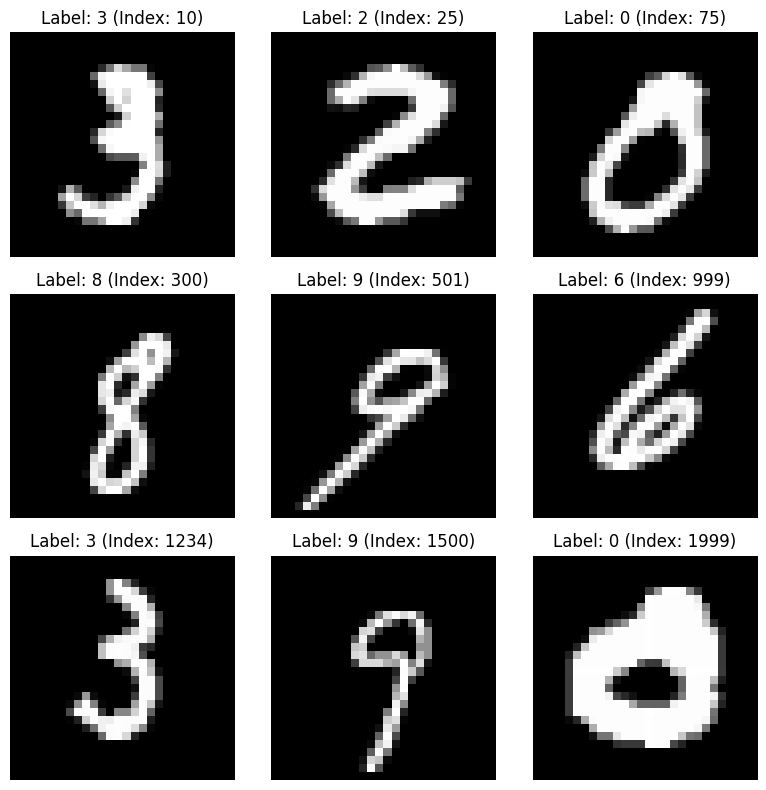

In [23]:
# Plot some digits from dataset
selected_indices = [10, 25, 75, 300, 501, 999, 1234, 1500, 1999]  # Choose which image indices to display

plt.figure(figsize=(8, 8))

for i, idx in enumerate(selected_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]} (Index: {idx})")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [24]:
# Step 4: Build the ANN Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Step 6: Train the Model
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8287 - loss: 0.5612 - val_accuracy: 0.9570 - val_loss: 0.1587
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9256 - loss: 0.2553 - val_accuracy: 0.9670 - val_loss: 0.1165
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9416 - loss: 0.1987 - val_accuracy: 0.9733 - val_loss: 0.0969
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9515 - loss: 0.1649 - val_accuracy: 0.9748 - val_loss: 0.0874
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9556 - loss: 0.1464 - val_accuracy: 0.9758 - val_loss: 0.0839
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9608 - loss: 0.1295 - val_accuracy: 0.9773 - val_loss: 0.0790
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9649 - loss: 0.1166 - val_accuracy: 0.9783 - val_loss: 0.0771
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9676 - loss: 0.1082 - val_accuracy

In [27]:
# Step 7: Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9781 - loss: 0.0750
Test Accuracy: 0.9781


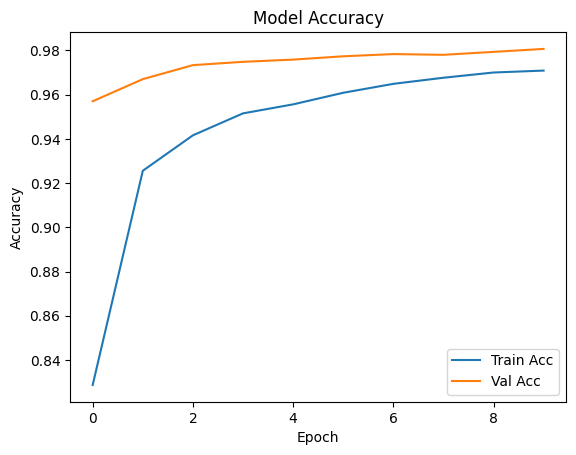

In [28]:
# Step 8: Visualize Training History
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


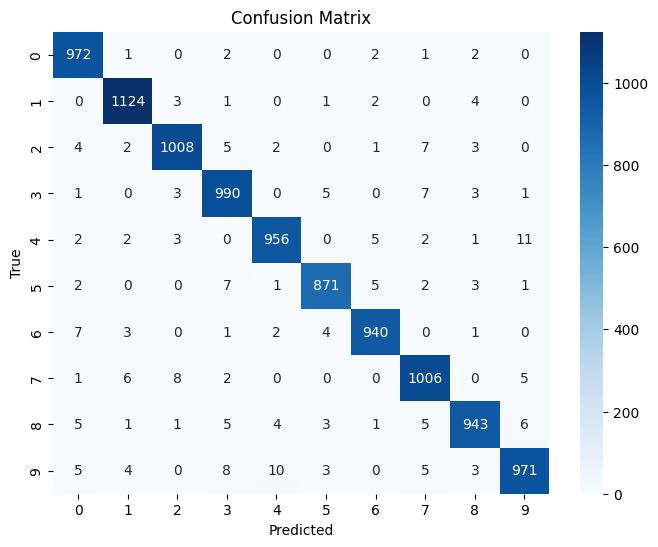

In [29]:
# Step 9: Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [30]:
# Step 10: Classification Report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
# Step 11: Save and Reload the Model
model.save("mnist_ann_model.h5")

from tensorflow.keras.models import load_model
reloaded_model = load_model("mnist_ann_model.h5")
reloaded_model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9781 - loss: 0.0750


[0.07496780157089233, 0.9781000018119812]

In [36]:
### Project Summary: MNIST Handwritten Digit Classification Using Artificial Neural Networks

#This project involves building, training, and evaluating an Artificial Neural Network (ANN) to classify handwritten digits from the MNIST dataset. The MNIST dataset is a widely used benchmark dataset in machine learning and deep learning for image classification tasks. It contains 70,000 grayscale images of digits (0–9), each of size 28×28 pixels. The dataset is split into 60,000 training images and 10,000 test images.

#### Key Steps in the Project:

1. **Data Loading and Preprocessing**:
    - The MNIST dataset was loaded using TensorFlow's `mnist` module.
    - The pixel values of the images were normalized to the range [0, 1] to improve model training.
    - The labels were one-hot encoded to prepare them for multi-class classification.

2. **Exploratory Data Analysis**:
    - A subset of images from the training dataset was visualized to understand the data distribution and verify the preprocessing steps.

3. **Model Architecture**:
    - A Sequential ANN model was built using Keras.
    - The architecture includes:
      - A `Flatten` layer to convert the 28×28 images into a 1D vector.
      - Two dense layers with 128 and 64 neurons, respectively, each followed by a `Dropout` layer to prevent overfitting.
      - A final dense layer with 10 neurons and a `softmax` activation function for multi-class classification.

4. **Model Compilation**:
    - The model was compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

5. **Model Training**:
    - The model was trained for 10 epochs with a batch size of 128.
    - A validation split of 10% was used to monitor the model's performance on unseen data during training.

6. **Model Evaluation**:
    - The trained model was evaluated on the test dataset, achieving a test accuracy of approximately 97.81%.

7. **Performance Visualization**:
    - The training and validation accuracy over epochs were plotted to analyze the model's learning behavior.
    - A confusion matrix was generated to evaluate the model's performance across different classes.

8. **Classification Report**:
    - A detailed classification report was generated, showing precision, recall, and F1-score for each class.

9. **Model Saving and Reloading**:
    - The trained model was saved in the HDF5 format and reloaded to verify its functionality.

---

#### Key Insights:

1. **Model Performance**:
    - The ANN achieved a high test accuracy of 97.81%, demonstrating its effectiveness in classifying handwritten digits.
    - The confusion matrix and classification report revealed that the model performed well across most classes, with minor misclassifications in some digits.

2. **Normalization Impact**:
    - Normalizing the pixel values to the range [0, 1] significantly improved the model's convergence during training.

3. **Dropout Layers**:
    - The inclusion of dropout layers helped mitigate overfitting, as evidenced by the close alignment of training and validation accuracy curves.

4. **Class Imbalance**:
    - The confusion matrix highlighted that certain digits were more prone to misclassification, possibly due to their similarity in shape (e.g., 5 and 6).

5. **Scalability**:
    - The model architecture is simple yet effective, making it scalable for similar image classification tasks with minimal modifications.

6. **Reusability**:
    - The trained model was successfully saved and reloaded, ensuring its reusability for future predictions or further fine-tuning.

---

This project demonstrates the power of deep learning in solving image classification problems and provides a solid foundation for exploring more advanced architectures like Convolutional Neural Networks (CNNs) for improved performance on image data.

SyntaxError: unterminated string literal (detected at line 8) (1209333265.py, line 8)